Flower Image Classification projects classifies flower dataset between 10 classes.
This project is based on supervised Learning Algorithm as the Test data is labelled.

Importing all necessary Modules and packages.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import os
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator


2024-04-03 07:48:41.649241: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-03 07:48:41.649370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-03 07:48:41.804078: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Importing Training and Testing dataset from the directory in form of classes and resizing every image into (250, 250) pixels to create uniformity among all dataset. As the data is imported in Batches in size of 128, The data needs to be concatenated to form complete dataset.

In [3]:
training_data = tf.keras.utils.image_dataset_from_directory(
'/kaggle/input/testing/flowerdataset/train',
seed = 42,
image_size = (250,250),
batch_size = 128)

x_training = []
y_training = []
for images, labels in training_data.unbatch():
    x_training.append(images.numpy())
    y_training.append(labels.numpy())

x_training = np.array(x_training)
y_training = np.array(y_training)

Found 4876 files belonging to 10 classes.


In [9]:
testing_data = tf.keras.utils.image_dataset_from_directory(
'/kaggle/input/testing/flowerdataset/test',
seed = 42,
image_size = (250,250),
batch_size = 128)

x_test = []
y_test = []
for images, labels in testing_data.unbatch():
    x_test.append(images.numpy())
    y_test.append(labels.numpy())

x_test = np.array(x_test)
y_test = np.array(y_test)

x_test.shape, y_test.shape

Found 1614 files belonging to 10 classes.


((1614, 250, 250, 3), (1614,))

From above, we observed that there are 1614 Test Images each having size of (250, 250) in RGB scale.

Now lets split the training dataset into training and validation dataset. It is ideally splitted into 80-20% ratio to achieve maximum accuracy.

In [5]:
className = training_data.class_names

Exploratory Data Analysis:
Now that we have splitted our data and obtained 3 sets, training, validation and testing, let's understand the data.

In [6]:
X_train, X_valid, y_train, y_valid = train_test_split(x_training, y_training, test_size=0.2, random_state = 42,  stratify = y_training)
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((3900, 250, 250, 3), (3900,), (976, 250, 250, 3), (976,))

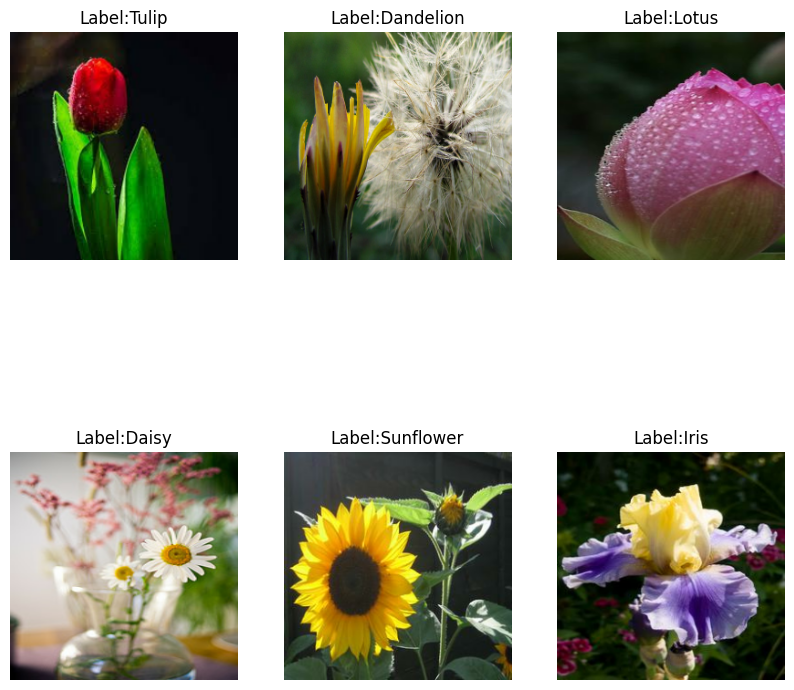

In [9]:
class_names = training_data.class_names
plt.figure(figsize=(10, 10))
index_array = np.random.randint(1,len(y_train), 6)
j = 1
for i in index_array:
        ax = plt.subplot(2,3,j)
        plt.imshow(X_train[i].astype("uint8"))
        plt.title('Label:' + class_names[y_train[i]])
        plt.axis("off")
        j+= 1


Here there are 3900 Images in training and 976 Images in validation set. Stratify parameter helped in dividing dataset in such a way that there would be 80-20% split within each class as well.

In [12]:
name = []
for i in range (0, len(y_train)):
    name.append(className[y_train[i]])
y_train_pd = pd.DataFrame(y_train)
y_train_pd[1] = name
y_train_pd.value_counts().sort_index()



0  1        
0  Carnation    416
1  Daisy        406
2  Dandelion    394
3  Iris         450
4  Lilly        320
5  Lotus        320
6  Orchid       320
7  Rose         447
8  Sunflower    404
9  Tulip        423
Name: count, dtype: int64

In [13]:
name = []
for i in range (0, len(y_valid)):
    name.append(className[y_valid[i]])
y_valid_pd = pd.DataFrame(y_valid)
y_valid_pd[1] = name
y_valid_pd.value_counts().sort_index()

0  1        
0  Carnation    104
1  Daisy        102
2  Dandelion     99
3  Iris         112
4  Lilly         80
5  Lotus         80
6  Orchid        80
7  Rose         112
8  Sunflower    101
9  Tulip        106
Name: count, dtype: int64

In [14]:
name = []
for i in range (0, len(y_test)):
    name.append(className[y_test[i]])
y_test_pd = pd.DataFrame(y_test)
y_test_pd[1] = name
y_test_pd.value_counts().sort_index()

0  1        
0  Carnation    145
1  Daisy        206
2  Dandelion    196
3  Iris         208
4  Lilly        100
5  Lotus        100
6  Orchid        89
7  Rose         169
8  Sunflower    196
9  Tulip        205
Name: count, dtype: int64

[Text(0.5, 0, '')]

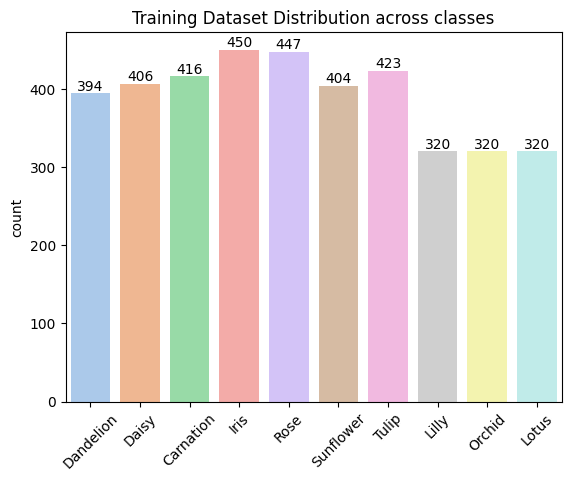

In [15]:

sns.set_palette("pastel")
ax = sns.countplot(x= 1,data=y_train_pd)

ax.bar_label(container=ax.containers[0])
plt.title("Training Dataset Distribution across classes")
plt.xticks(rotation=45)
ax.set(xlabel=None)


From above we can conclude that Iris Class has largest dataset while Lilly, Orchid and Lotus are having smaller dataset compared to other.

[Text(0.5, 0, '')]

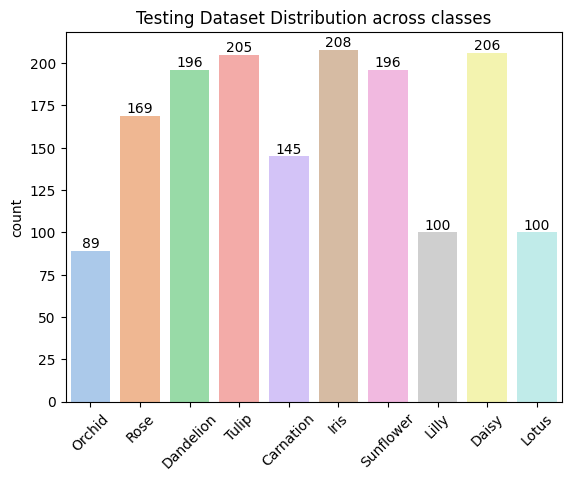

In [16]:
sns.set_palette("pastel")
ax = sns.countplot(x= 1,data=y_test_pd)
ax.bar_label(container=ax.containers[0])
plt.title("Testing Dataset Distribution across classes")
plt.xticks(rotation=45)
ax.set(xlabel=None)


Whereas in Testing dataset we can observe that Orchid has the least instances.

In [17]:
X_train.dtype

dtype('float32')

In [18]:
train_class = training_data.class_names
len(train_class)

10

In [34]:
model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255, input_shape=(250, 250,3)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(5,5)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),padding='valid',activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(3,3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.1)),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(len(train_class), activation='softmax')
])
model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 250, 250, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 248, 248, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 82, 82, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 78, 78, 32)     │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 15, 15, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 13, 13, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 154,746 (604.48 KB)

 Trainable params: 154,682 (604.23 KB)

 Non-trainable params: 64 (256.00 B)

In [35]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [36]:
X_train.shape, y_valid.shape, X_valid.shape, y_valid.shape

((3900, 250, 250, 3), (976,), (976, 250, 250, 3), (976,))

In [37]:
history = model.fit(X_train,y_train, epochs=60, validation_data=(X_valid, y_valid))

Epoch 1/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 96s 759ms/step - accuracy: 0.2306 - loss: 20.4626 - val_accuracy: 0.4672 - val_loss: 2.8927
Epoch 2/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 141s 750ms/step - accuracy: 0.4475 - loss: 2.1679 - val_accuracy: 0.4232 - val_loss: 2.1933
Epoch 3/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 749ms/step - accuracy: 0.4656 - loss: 1.8385 - val_accuracy: 0.5102 - val_loss: 1.7963
Epoch 4/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 142s 750ms/step - accuracy: 0.5472 - loss: 1.6609 - val_accuracy: 0.3443 - val_loss: 2.1006
Epoch 5/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 162s 915ms/step - accuracy: 0.5302 - loss: 1.6847 - val_accuracy: 0.4385 - val_loss: 1.8392
Epoch 6/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 92s 753ms/step - accuracy: 0.5350 - loss: 1.6224 - val_accuracy: 0.5400 - val_loss: 1.6381
Epoch 7/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 146s 791ms/step - accuracy: 0.5732 - loss: 1.5727 - val_accuracy: 0.5000 - val_loss: 1.7706
Epoch 8/60
122/122 ━━━━━━━━━━━━━━━━━━━━ 140s 772ms/step - accuracy: 0.5655 - 

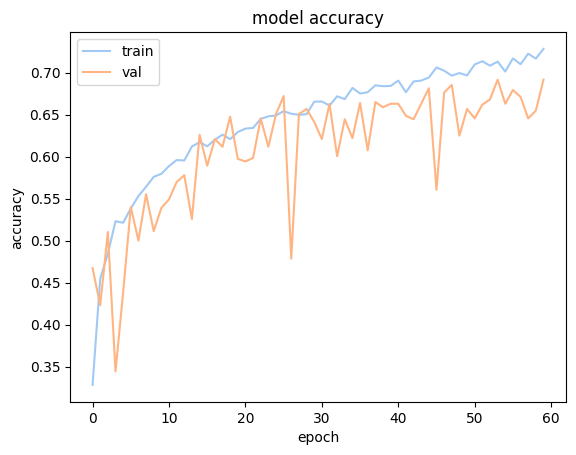

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [56]:
test_classes =[i for i in os.listdir("/kaggle/input/testing/flowerdataset/test")]
train_classes =[i for i in os.listdir("/kaggle/input/testing/flowerdataset/train")]
print("Test Classes:",test_classes)
print("\nTrain Classes:", train_classes)

Test Classes: ['Orchid', 'Dandelion', 'Daisy', 'Carnation', 'Sunflower', 'Tulip', 'Lotus', 'Rose', 'Lilly', 'Iris']

Train Classes: ['Orchid', 'Dandelion', 'Daisy', 'Carnation', 'Sunflower', 'Tulip', 'Lotus', 'Rose', 'Lilly', 'Iris']


In [57]:
y=model.predict(x_test)
y_pred= np.argmax(y, axis= 1)

51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 224ms/step


In [59]:
conf_metrix=confusion_matrix(y_pred, y_test)
conf_test = (conf_metrix/ conf_metrix.astype('int').sum(axis=1)) * 100
conf_test.astype('int')

array([[49,  6,  1,  3,  7,  7, 15, 31,  0,  2],
       [ 0, 91,  1,  0,  5,  2,  0,  0,  1,  0],
       [ 4, 13, 68,  2,  9,  4,  0,  1, 16,  1],
       [ 1,  1,  0, 84,  4,  7, 13,  0,  0,  3],
       [ 3,  1,  0,  0, 45, 10, 16,  0,  4,  5],
       [ 1,  4,  0,  0,  6, 66,  3,  2,  0,  3],
       [ 3,  1,  0,  0,  8,  5, 59,  0,  0,  3],
       [10,  1,  0,  0,  3,  3,  1, 62,  0, 11],
       [ 0,  2,  1,  0,  0,  0,  0,  0, 92,  1],
       [ 1,  1,  0,  0, 14,  4,  2, 17,  1, 72]])

In [60]:
y = model.predict(X_train)
y_train_pred  = np.argmax(y, axis = 1)

122/122 ━━━━━━━━━━━━━━━━━━━━ 28s 228ms/step


In [61]:
report = classification_report(y_train_pred, y_train, target_names= train_classes)
print("Classification Report for Training Data:")
print(report)

Classification Report for Training Data:
              precision    recall  f1-score   support

      Orchid       0.67      0.63      0.65       441
   Dandelion       0.81      0.92      0.87       357
       Daisy       0.98      0.70      0.82       548
   Carnation       0.98      0.84      0.91       521
   Sunflower       0.51      0.65      0.57       249
       Tulip       0.72      0.83      0.77       277
       Lotus       0.66      0.74      0.70       287
        Rose       0.77      0.78      0.77       445
       Lilly       0.84      0.99      0.91       345
        Iris       0.82      0.81      0.81       430

    accuracy                           0.79      3900
   macro avg       0.78      0.79      0.78      3900
weighted avg       0.80      0.79      0.79      3900



From here we can see that our training dataset has 79% accuracy.

Classification Report for Testing Data:
              precision    recall  f1-score   support

      Orchid       0.65      0.49      0.56       191
   Dandelion       0.73      0.92      0.81       165
       Daisy       0.91      0.69      0.78       258
   Carnation       0.92      0.84      0.88       228
   Sunflower       0.44      0.46      0.45        96
       Tulip       0.59      0.66      0.62        89
       Lotus       0.53      0.59      0.56        79
        Rose       0.53      0.62      0.57       143
       Lilly       0.79      0.93      0.85       166
        Iris       0.71      0.73      0.72       199

    accuracy                           0.71      1614
   macro avg       0.68      0.69      0.68      1614
weighted avg       0.73      0.71      0.71      1614



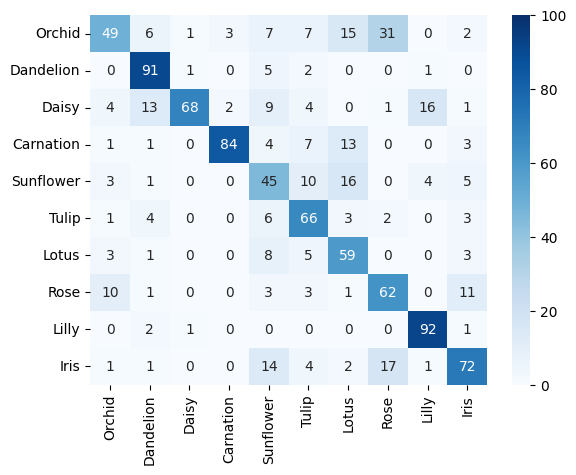

In [62]:
sns.heatmap(conf_test.astype('int'),annot=True, vmin = 0, vmax = 100, xticklabels=test_classes, yticklabels=test_classes,cmap='Blues')

report = classification_report(y_pred, y_test, target_names=test_classes)
print("Classification Report for Testing Data:")
print(report)

While our testing data has an accuracy of 71%

In [63]:
acc_score = model.evaluate(x_test, y_test)
acc_score

51/51 ━━━━━━━━━━━━━━━━━━━━ 12s 230ms/step - accuracy: 0.7150 - loss: 1.1866


[1.1853363513946533, 0.7143742442131042]

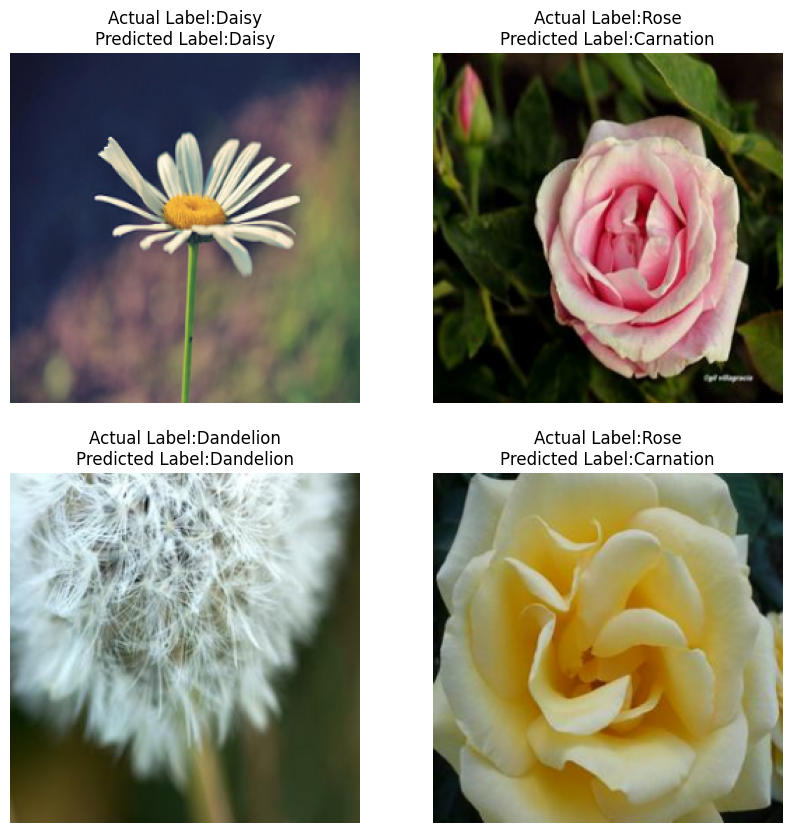

In [73]:
class_names = testing_data.class_names
plt.figure(figsize=(10, 10))
index_array = np.random.randint(1,len(y_test), 4)
j = 1
for i in index_array:
        ax = plt.subplot(2,2,j)
        plt.imshow(x_test[i].astype("uint8"))
        plt.title('Actual Label:' + class_names[y_test[i]]+ '\nPredicted Label:'+ class_names[y_pred[i]])
        plt.axis("off")
        j+= 1
